 # <font color='red'> Waveform generator</font>

## Table of contents

1. [Initial settings](#Settings)
2. [Time scales definition](#Timescalesdefinition)
3. [Pulse sequence generation](#Pulsesequence)
    1. [Pump](#Pump)
    2. [REEX](#REEX)
    3. [Clock](#Clock)
4. [Plots](#Plots)
    1. [Pump/REEX/Clock modulation](#Plot1)
    2. [Pulse sequence for EOM](#EOM)
    3. [Fancy plot Pump+EOM](#Pump+EOM)
5. [Reflectivity vs Voltage](#Reflectivity)
6. [Conversion to csv file](#Conversion)
    

<a name="Settings"></a>
## Initial settings

In [1]:
import numpy as np
import math
from scipy import signal
from matplotlib import pyplot as plt

In [2]:
# initial settings


amp = 3.3
offset = 0
phase = 0

t_tot = 125       # type in ns

frequency = round((1/t_tot)*(1e09)) #
print(f'{frequency} Hz')

# samples = round(500000000/frequency)
samples=800
print(samples)

8000000 Hz
800


In [3]:
# function converting time intervals --> samples

def convert(val_time):
    val_samples = (samples * val_time)/  t_tot
    return val_samples

In [29]:
#2D-list with initial data (necessary for the csv file)

initial_list = [['data length', samples],
              ['frequency', frequency],
              ['amp', amp],
              ['offset', offset],
              ['phase', phase],
              [None,None],
              ['xpos','value']]

<a name="Timescalesdefinition"></a>
## Time-scales definition

In [4]:
pulse_duration_ns = 15    # type input in ns
pause_duration_ns = 85    
intro_duration = 50     
remaining_duration = 50


pulse_duration_samples = round(convert(pulse_duration_ns))
pause_duration_samples = round(convert(pause_duration_ns)) 
intro_duration_samples = round(convert(intro_duration))
remaining_duration_samples = round(convert(remaining_duration))


 
t_samples = np.linspace(1, samples, samples, endpoint=False)


pulse_time_samples = np.linspace(0, 2 * np.pi, pulse_duration_samples+1, endpoint=False) # "internal" time within a pulse
 

pause_time_samples = np.linspace(0, 2 * np.pi, pause_duration_samples+1, endpoint=False)   # "internal" time within a pause


intro_time_samples = np.linspace(0, 2 * np.pi, intro_duration_samples+1, endpoint=False)  # "internal" time within the intro


remaining_time_samples = np.linspace(0, 2 * np.pi, remaining_duration_samples+1, endpoint=False)  # "internal" time until the end


In [ ]:
# t_ns = np.linspace(1, t_tot, t_tot, endpoint=False)
# pulse_time_ns = np.linspace(0, 2 * np.pi, pulse_duration_ns+1, endpoint=False)
# pause_time_ns = np.linspace(0, 2 * np.pi, pause_duration_ns+1, endpoint=False)
# intro_time_ns = np.linspace(0, 2 * np.pi, intro_duration +1, endpoint=False)
# remaining_time_ns = np.linspace(0, 2 * np.pi, remaining_duration +1, endpoint=False)

<a name="Pulsesequence"></a>
## Pulse sequence generation 

In [5]:
# asking the input configuration to the user

m = int(input("Enter the required number of modes: "))
print("\n")
num_list = [int(num) for num in input("Enter the occupation numbers (1 or 0) of the modes, separated by space: ").split()[:m]]
input_sequence = np.array(num_list)



#generating the waveform

waveform_pieces = []

waveform_pieces.append(signal.square(intro_time_samples, duty=0)+1) #intro  (always 0)

for i in range(0,m):     # these are my m modes
    
    if (input_sequence[i]==1):
        piece = np.concatenate([signal.square(pulse_time_samples, duty=0)*3.3, signal.square(pause_time_samples, duty=0)+1])
        
    elif (input_sequence[i]==0):
        piece = np.concatenate([signal.square(pulse_time_samples, duty=0)+1, signal.square(pause_time_samples, duty=0)+1])
    
    waveform_pieces.append(piece)
    
waveform_pieces.append(signal.square(remaining_time_samples, duty=0)+1) #final  (always 0)
      
    
waveform_samples = np.concatenate(waveform_pieces)    

Enter the required number of modes: 6


Enter the occupation numbers (1 or 0) of the modes, separated by space: 0 1 0 1 0 1


In [6]:
# generating the waveform

waveform_pieces = []

waveform_pieces.append(signal.square(intro_time_samples, duty=0)+1) #intro  (always 0)

for i in range(0,m):     # these are my m modes
    
    if (input_sequence[i]==1):
        piece = np.concatenate([signal.square(pulse_time_samples, duty=0)*(-3.3), signal.square(pause_time_samples, duty=0)+1])
        
    elif (input_sequence[i]==0):
        piece = np.concatenate([signal.square(pulse_time_samples, duty=0)+1, signal.square(pause_time_samples, duty=0)+1])
    
    waveform_pieces.append(piece)
    
waveform_pieces.append(signal.square(remaining_time_samples, duty=0)+1) #final  (always 0)
      
    
waveform_samples = np.concatenate(waveform_pieces)  

<a name="Plots"></a>
## Plots

<a name="Plot1"></a>
### Pump/ REEX/ Clock

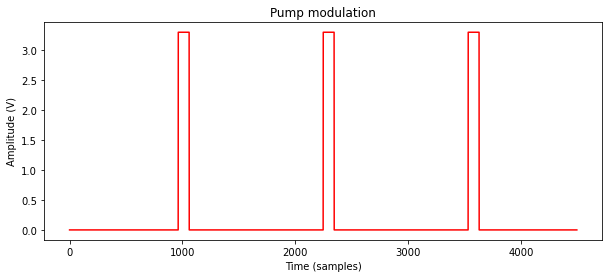

In [10]:
import matplotlib.ticker as ticker

plt.figure(figsize=(10,4))
plt.plot(waveform_samples,'red')

#plt.grid()
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude (V)')
plt.title('Pump modulation')
#plt.axis([25000, 30000 , -1, 1]) # [xstart, xend, ystart, yend]
plt.savefig("Waveform pump.pdf",  dpi=70)
plt.show() 

<a name="EOM"></a>
## Pulse sequence for EOM

<ipython-input-9-c5773e76ae81>:36: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "trasparency" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("Waveform EOM.pdf", trasparency=True, dpi=70)


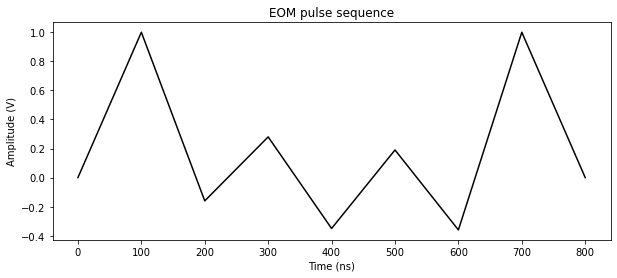

In [9]:
import matplotlib.ticker as ticker




x = np.arange(0,9)*100

y = np.array([
0,
1,
-0.16,
0.28,
-0.35,
0.19,
-0.36,
1,
0])

# y = np.array([0, 0, 0, -1, -0.02, 0.38, 0.65, 1, 1, 1, 0.15, -1, 0, 0, 0, 0])   #thermalization

# y = np.array([0, 0, -1, -0.27, 0, 0.16, 0.29, 0.38, -1, 0])  #optimized

# y = np.array([0, 0, 0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  -1, 0, 0, 0])  #constant

# y = np.array([0, -1, 0.07, -1, 0])  # Hong Ou Mandel

plt.figure(figsize=(10,4))

plt.plot(x,y, color='black')

#plt.grid()
plt.xlabel('Time (ns)')
plt.ylabel('Amplitude (V)')
plt.title('EOM pulse sequence')
#plt.axis([25000, 30000 , -1, 1]) # [xstart, xend, ystart, yend]
plt.savefig("Waveform EOM.pdf", trasparency=True, dpi=70)
plt.show() 

In [46]:
import csv

lista_2d_numbers = list(zip(t_samples, waveform_samples))

lista_2d = initial_list + lista_2d_numbers

#print(lista2d)

file = open('waveform_1.csv', 'w+', newline ='') 
with file:     
    write = csv.writer(file) 
    write.writerows(lista_2d)

## Conversion to txt file

In [29]:
with open('EOMwave.txt', 'w') as EOMwave:   
    for numero in y:
        EOMwave.write(str(numero) + '\n')
    print('File created')

File created
